# Parameters Estimation

#### Se definen las señales $x[n]$ y $y[n]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 10
sigma = 1
wn = sigma*np.random.randn(N)
x = np.arange(N) + 1
y = 1 + x +wn

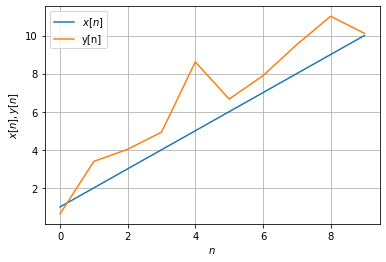

In [3]:
plt.plot(x)
plt.plot(y)
plt.grid('on')
plt.xlabel('$n$')
plt.ylabel('$x[n], y[n]$')
plt.legend(['$x[n]$','y[n]']);

#### Se estiman los parámetros a y b para una realizacion:

In [4]:
a = ((np.sum(x**2)*np.sum(y))-(np.sum(x)*np.sum(x*y)))/(N*np.sum(x**2)-np.sum(x)**2)

In [5]:
print(a)

0.9093886135573187


In [6]:
b =  ((N*np.sum(x*y))-(np.sum(x)*np.sum(y)))/(N*np.sum(x**2)-np.sum(x)**2)

In [7]:
print(b)

1.0490779554990735


#### Se obtienen valores cercanos a 1 como lo esperado.

#### Se ejecuta el algoritmo 10000 veces y se estiman los valores de a y b en los vectores $A_{est}$ y $B_{est}$

In [8]:
K = 10000
A_est = np.zeros(K)
B_est = np.zeros(K)

for i in range(K):
    wn = sigma*np.random.randn(N)
    y = 1 + x +wn
    # Del modelo de regresión lineal de mínimos cuadrados, se tiene:
    A_est[i] = ((np.sum(x**2)*np.sum(y))-(np.sum(x)*np.sum(x*y)))/(N*np.sum(x**2)-np.sum(x)**2)
    B_est[i] = ((N*np.sum(x*y))-(np.sum(x)*np.sum(y)))/(N*np.sum(x**2)-np.sum(x)**2)
    

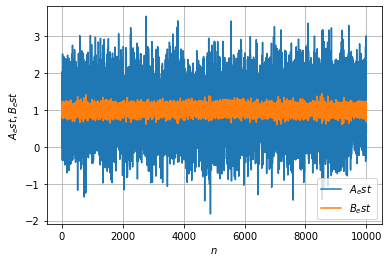

In [9]:
plt.plot(A_est)
plt.plot(B_est)
plt.grid('on')
plt.xlabel('$n$')
plt.ylabel('$A_est, B_est$')
plt.legend(['$A_est$' , '$B_est$'])

In [10]:
print(np.mean(A_est))
print(np.mean(B_est))
print(np.var(A_est))
print(np.var(B_est))

0.9996380061457163
0.9998027930668771
0.45775742475778686
0.011806821624700774


#### $A_{est}$ y $B_{est}$ tienen una media alrededor de 1, como lo esperado, la varinza de $A_{est}$ es mayor

#### Histograma de $A_{est}$

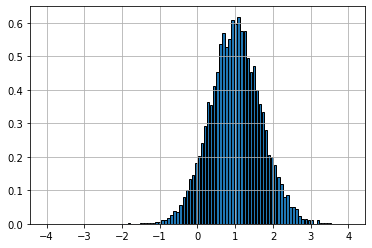

In [11]:
xrange = [-4,4]
Nb = 100
dx = (xrange[1] - xrange[0]) / (Nb-1)
bins = xrange[0]-dx/2 + np.arange(Nb+1)*dx
plt.figure()
plt.hist(A_est,bins=bins,rwidth=0.8,align='mid',ec='k',density=True)
plt.grid('on')

#### Histograma de $B_{est}$

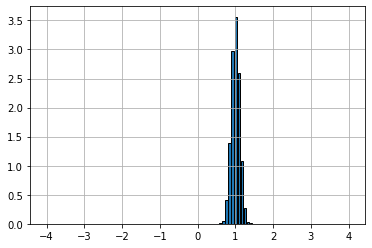

In [12]:
xrange = [-4,4]
Nb = 100
dx = (xrange[1] - xrange[0]) / (Nb-1)
bins = xrange[0]-dx/2 + np.arange(Nb+1)*dx
plt.figure()
plt.hist(B_est,bins=bins,rwidth=0.8,align='mid',ec='k',density=True)
plt.grid('on')

Para los vectores de los datos estimados $A_{est}$ y $B_{est}$, matrices de covarianza:

$$ \mathbf{C}_{A_{est}}=E[(A_{est}-E[A_{est}])(A_{est}-E[A_{est}])^{T}] $$

$$ \mathbf{C}_{B_{est}}=E[(B_{est}-E[B_{est}])(B_{est}-E[B_{est}])^{T}] $$

In [13]:
EA_est = np.mean(A_est)
EB_est = np.mean(B_est)

Aest_EAest = A_est - EA_est
Best_EBest = B_est - EB_est
Aest_EAest = Aest_EAest.reshape(-1, 1)
Best_EBest = Best_EBest.reshape(-1, 1)

C_A_est = np.dot(Aest_EAest,np.transpose(Aest_EAest))
C_B_est = np.dot(Best_EBest,np.transpose(Best_EBest))

In [14]:
print(C_A_est)

[[ 0.08716736 -0.13739383 -0.02844717 ...  0.12048603  0.19280015
   0.12445427]
 [-0.13739383  0.21656114  0.04483864 ... -0.18991096 -0.30389299
  -0.19616572]
 [-0.02844717  0.04483864  0.00928377 ... -0.03932076 -0.06292056
  -0.0406158 ]
 ...
 [ 0.12048603 -0.18991096 -0.03932076 ...  0.16654036  0.26649567
   0.17202541]
 [ 0.19280015 -0.30389299 -0.06292056 ...  0.26649567  0.42644283
   0.27527278]
 [ 0.12445427 -0.19616572 -0.0406158  ...  0.17202541  0.27527278
   0.17769111]]


In [15]:
print(C_B_est)

[[ 0.00760307 -0.00751013 -0.00191931 ...  0.01011663  0.0186737
   0.00571129]
 [-0.00751013  0.00741831  0.00189585 ... -0.00999296 -0.01844542
  -0.00564147]
 [-0.00191931  0.00189585  0.00048451 ... -0.00255383 -0.00471397
  -0.00144175]
 ...
 [ 0.01011663 -0.00999296 -0.00255383 ...  0.01346116  0.02484718
   0.00759943]
 [ 0.0186737  -0.01844542 -0.00471397 ...  0.02484718  0.04586397
   0.01402734]
 [ 0.00571129 -0.00564147 -0.00144175 ...  0.00759943  0.01402734
   0.00429021]]


#### Desviación stándar $\sigma_{a}$ y $\sigma_b$

In [16]:
sigma_A_est = np.sqrt(np.var(A_est))
sigma_B_est = np.sqrt(np.var(B_est))
print(sigma_A_est)
print(sigma_B_est)

0.6765777300190916
0.10865919944809448


In [17]:
A_prima = (A_est-1)/sigma_A_est
B_prima = (B_est-1)/sigma_B_est

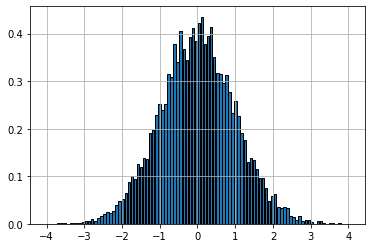

In [18]:
Nb = 100
dx = (xrange[1] - xrange[0]) / (Nb-1)
bins = xrange[0]-dx/2 + np.arange(Nb+1)*dx
plt.figure()
plt.hist(A_prima,bins=bins,rwidth=0.8,align='mid',ec='k',density=True)
plt.grid('on')

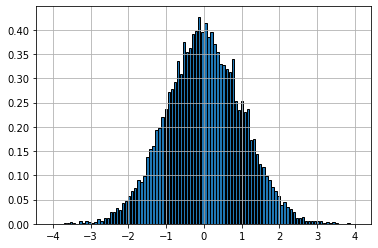

In [19]:
Nb = 100
dx = (xrange[1] - xrange[0]) / (Nb-1)
bins = xrange[0]-dx/2 + np.arange(Nb+1)*dx
plt.figure()
plt.hist(B_prima,bins=bins,rwidth=0.8,align='mid',ec='k',density=True)
plt.grid('on')

In [20]:
print(np.mean(A_prima))
print(np.mean(B_prima))

-0.0005350366088365059
-0.0018149124429828677


In [21]:
print(np.sqrt(np.var(A_prima)))
print(np.sqrt(np.var(B_prima)))

1.0
1.0


#### Se confirma en base a los resultados y los histogramas de $a'$ y $b'$, que tienen media cero y varianza 1.